/scratch/abdu/833135/ipykernel_91080/3232898957.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


Predicted Count :  13


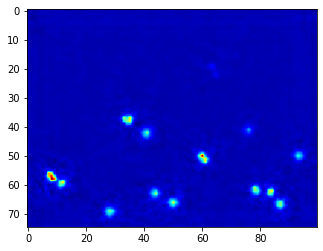

Original Count :  17


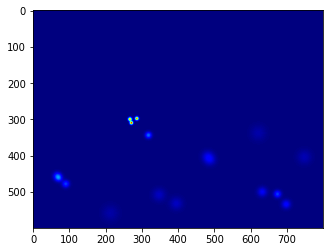

Original Image


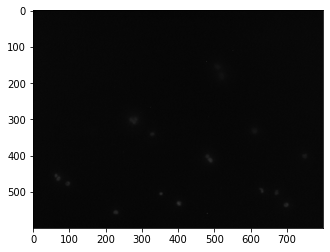

In [8]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from matplotlib import cm as c

from torchvision import datasets, transforms
'''
class torchvision.transforms.ToTensor
把一个取值范围是[0,255]的PIL.Image或者shape为(H,W,C)的numpy.ndarray，转换成形状为[C,H,W]，取值范围是[0,1.0]的torch.FloadTensor

class torchvision.transforms.Normalize(mean, std)
给定均值：(R,G,B) 方差：（R，G，B），将会把Tensor正则化。即：Normalized_image=(image-mean)/std。
'''
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

model = CSRNet()

#defining the model

model = model.cuda()

#loading the trained weights

checkpoint = torch.load('0model_best.pth.tar')

model.load_state_dict(checkpoint['state_dict'])

img = transform(Image.open("IDCIA/images/220912_GFP-AHPC_C_Map2AB_F2_DAPI_ND1_20x.tiff").convert('RGB')).cuda()

'''
unsqueeze（arg）是增添第arg个维度为1，以插入的形式填充
相反，squeeze（arg）是删除第arg个维度(如果当前维度不为1，则不会进行删除)
'''
output = model(img.unsqueeze(0))

print("Predicted Count : ", int(output.detach().cpu().sum().numpy()))

temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))

plt.imshow(temp, cmap = c.jet)

plt.show()

temp = h5py.File("IDCIA/ground_truth/220912_GFP-AHPC_C_Map2AB_F2_DAPI_ND1_20x.h5", 'r')

temp_1 = np.asarray(temp['density'])

plt.imshow(temp_1,cmap = c.jet)

print("Original Count : ",int(np.sum(temp_1)) + 1)

plt.show()

print("Original Image")

plt.imshow(plt.imread("IDCIA/images/220912_GFP-AHPC_C_Map2AB_F2_DAPI_ND1_20x.tiff"),cmap='gray')

plt.show()